In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl, matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid") # Setting style for all graphs
%matplotlib inline

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_2005_2007 = pd.read_csv("../input/2000-16-traffic-flow-england-scotland-wales/accidents_2005_to_2007.csv")
df_2009_2011 = pd.read_csv("../input/2000-16-traffic-flow-england-scotland-wales/accidents_2009_to_2011.csv")
df_2012_2014 = pd.read_csv("../input/2000-16-traffic-flow-england-scotland-wales/accidents_2012_to_2014.csv")
# seems like we don't have 2008 data

accidents = pd.concat([df_2005_2007, df_2009_2011,df_2012_2014], axis=0)

In [3]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

In [4]:
accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [5]:
selRows = accidents[accidents['Time'].isna()].index
accidents = accidents.drop(selRows, axis=0)
accidents["Time"] = pd.to_datetime(accidents["Time"], format='%H:%M')
accidents["Hour"] = accidents["Time"].dt.hour


#accidents["Date"] = pd.to_datetime(accidents["Date"], format="%d/%m/%Y")
accidents["Month"] = pd.DatetimeIndex(accidents["Date"]).month

<a id="casualties"></a>

In [6]:
accidents["Number_of_Casualties"].unique() 

# It was supposed to contain only values 1: Fatal, 2: Serious, 3: Slight
# Sadly won't be able to analyze it

array([ 1,  2,  5,  4,  3,  8,  7,  6, 10,  9, 23, 17, 13, 11, 19, 15, 16,
       12, 14, 18, 20, 29, 21, 35, 22, 26, 45, 41, 36, 40, 25, 28, 42, 68,
       27, 48, 24, 43, 87, 63, 51, 33, 38, 46, 70, 93, 54])

,Features,MissingPercent
4,Junction_Detail,100.000000
5,Junction_Control,40.076830
13,LSOA_of_Accident_Location,7.190065
12,Did_Police_Officer_Attend_Scene_of_Accident,0.194236
9,Road_Surface_Conditions,0.129934
8,Weather_Conditions,0.008379
0,Location_Easting_OSGR,0.006716
1,Location_Northing_OSGR,0.006716
2,Longitude,0.006716
3,Latitude,0.006716


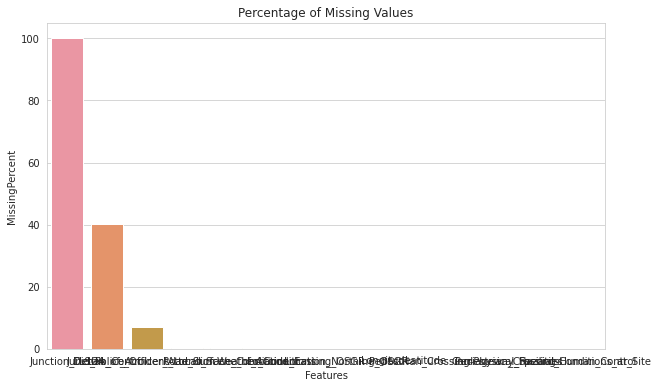

In [7]:
# Function showing missing values in each column
def get_missings(df):
    labels,values = list(),list()
    if df.isna().sum().sum()>0:
        for column in df.columns:
            if df[column].isnull().sum():
                labels.append(column)
                values.append((df[column].isnull().sum() / len(df[column]))*100)

                #Make a dataframe 
        missings=pd.DataFrame({'Features':labels,'MissingPercent':values }).sort_values(by='MissingPercent',ascending=False)
        plt.figure(figsize=(10,6))
        sns.barplot(x=missings.Features,y=missings.MissingPercent).set_title('Percentage of Missing Values')
        return missings
    else:
        return False

get_missings(accidents)

The columns with a big amount of missing data won't be used in our analysis. Other features have a very *little amount* of missing data (<1%), so we will just keep it that way.

In [8]:
accidents_peryear = {}

years = ['2005', '2006', "2007", "2009", "2010", "2011", "2012", "2013", "2014"]
for year in years:
    accidents_peryear[year] = accidents[accidents["Year"]==int(year)]

accidents_perdow = {}

dow = {1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday", 7:"Sunday"}
for key in dow:
    accidents_perdow[dow[key]] = accidents[accidents["Day_of_Week"]==key]
    
months = {1: "Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Ag", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}

In [9]:
# for whatever reason, year 2007 doens't seem to be sorted by date
print("Before:", accidents_peryear["2007"]["Month"].unique())

accidents_peryear["2007"] = accidents_peryear["2007"].sort_values("Month")
print("After:", accidents_peryear["2007"]["Month"].unique())

Before: [ 5  2  8  3  9 10 12  1 11  6  7  4]
After: [ 1  2  3  4  5  6  7  8  9 10 11 12]


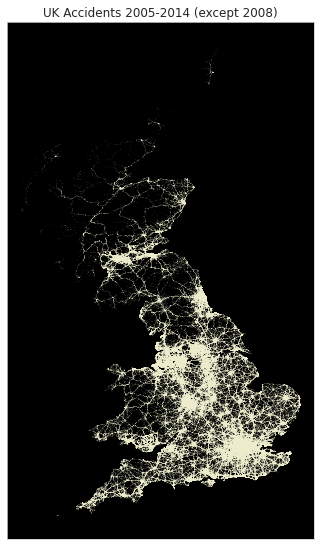

In [10]:
plt.figure(figsize=(5.5,9.5))
plt.axes().set_facecolor("black")
plt.scatter(x = accidents["Longitude"], y = accidents["Latitude"],s=0.005, alpha= 0.25, color="lightyellow")
plt.title("UK Accidents 2005-2014 (except 2008)")
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

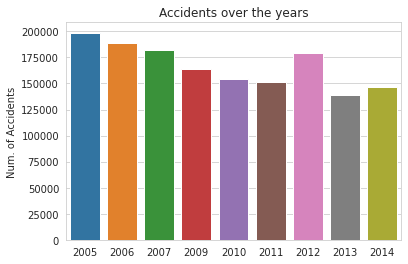

Mean:167093.22   Standard Deviation:21002.18


In [11]:
sns.barplot(x=accidents.Year.value_counts().index,y=accidents.Year.value_counts())
plt.ylabel("Num. of Accidents")
plt.title("Accidents over the years")

plt.show()

print("Mean:{:.2f}   Standard Deviation:{:.2f}".format(accidents.Year.value_counts().mean(), 
                                                      accidents.Year.value_counts().std()))

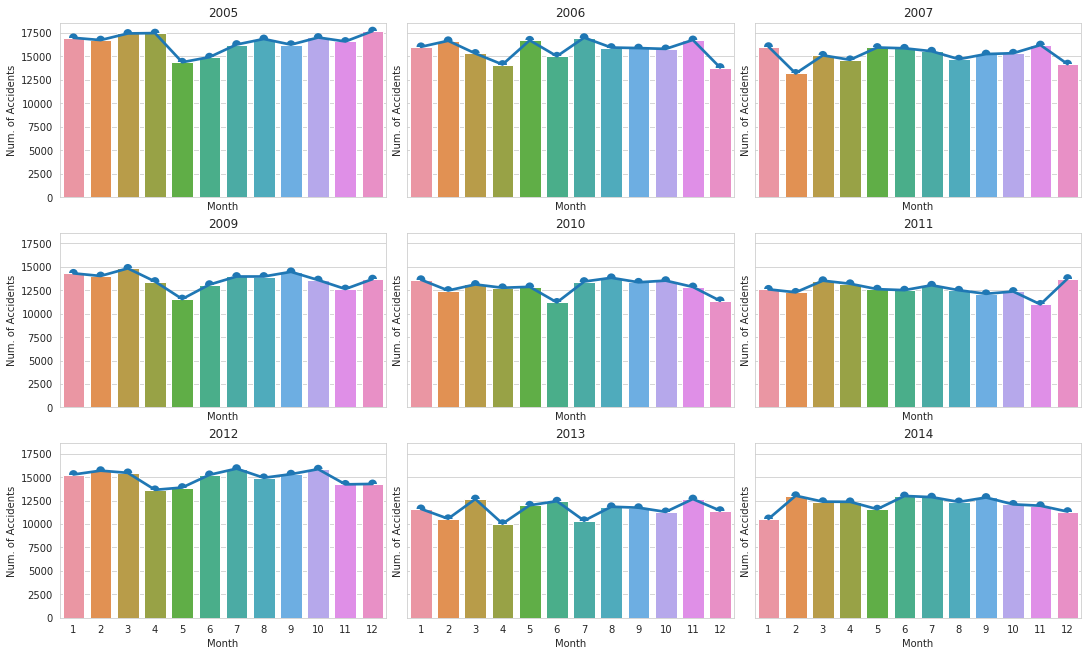

In [12]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, constrained_layout=True, figsize=(15,9))
year = 2004

for row in range(axs.shape[0]):
    for col in range(axs.shape[1]):
        year += 1
        if year == 2008: year = 2009
        sns.barplot(ax=axs[row][col],x=accidents_peryear[str(year)]["Month"].unique(),
                    y=accidents_peryear[str(year)].groupby("Month")["Year"].count())
        sns.pointplot(ax=axs[row][col],x=accidents_peryear[str(year)]["Month"].unique(),
                     y=accidents_peryear[str(year)].groupby("Month")["Year"].count())
        axs[row][col].set_ylabel("Num. of Accidents")
        axs[row][col].set_xlabel("Month")
        axs[row][col].set_title(str(year))
        
fig.show()

Here we can see again that there's just much more volume overall in 2012, not an eventual peak. Trends however, seem fairly similar.

**October** and **November** are consistently the months with most accidents

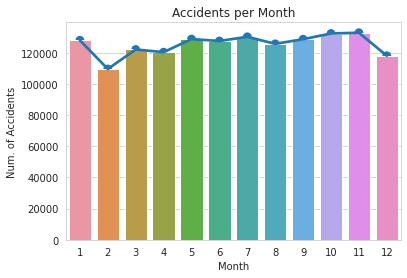


Mean:125319.92   Standard Deviation:6747.99



Month,1,2,3,4,5,6,7,8,9,10,11,12
Num. of Accidents,127974,109540,122059,120333,128738,127500,130196,125667,128656,132310,132815,118051


In [13]:
# Temporary df for viz
dfmonth = pd.DataFrame(accidents.groupby("Month")["Year"].count())
dfmonth = dfmonth.rename({"Year":"Num. of Accidents"}, axis=1)

sns.barplot(x = dfmonth.index, y = dfmonth["Num. of Accidents"])
sns.pointplot(x=dfmonth.index,y=dfmonth["Num. of Accidents"])
plt.title("Accidents per Month")
plt.show()

print("\nMean:{:.2f}   Standard Deviation:{:.2f}\n".format(float(dfmonth.mean().unique()), float(dfmonth.std().unique())))
dfmonth.T

On **average** a month has *125,345.83* accidents, with a **Standard Deviation** of *8,280.73*.

### Accidents per hour of the day

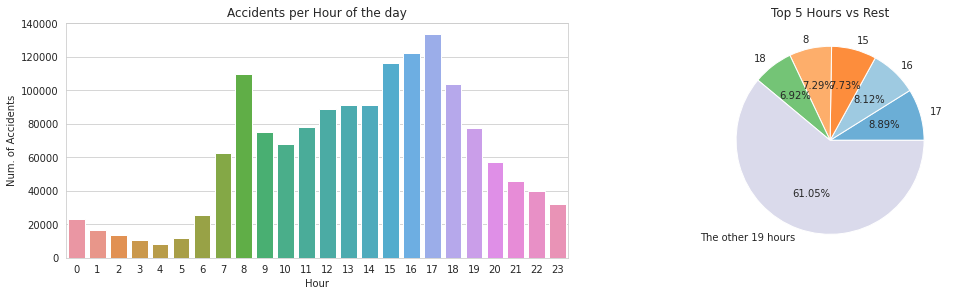


Mean:62659.96   Standard Deviation:39438.75

      Num. of Accidents
Hour                   
17               133728
16               122117
15               116250
8                109608
18               104067 



Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Num. of Accidents,23024,16886,13616,10826,8347,12032,25831,62368,109608,74893,...,91251,116250,122117,133728,104067,77717,57208,45746,39886,31875


In [14]:
df = pd.DataFrame(accidents.groupby("Hour")["Year"].count())
df = df.rename({"Year":"Num. of Accidents"}, axis=1)
top5hours = pd.DataFrame(df["Num. of Accidents"].nlargest(5))
elsehours = pd.DataFrame(data = {'Hour':'The other 19 hours',
                                 'Num. of Accidents':[df["Num. of Accidents"].nsmallest(19).sum()]})

elsehours.set_index("Hour", inplace=True)
topvsothers = pd.concat([top5hours, elsehours])


fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,4))

sns.barplot(ax=axs[0], x = df.index, y = df["Num. of Accidents"])
axs[0].set_title("Accidents per Hour of the day")

cmap = plt.get_cmap("tab20c")
colors = cmap(np.array([1, 2, 5, 6, 9,15]))
axs[1].pie(topvsothers["Num. of Accidents"], labels=topvsothers.index, autopct='%1.2f%%',colors=colors)
axs[1].set_title("Top 5 Hours vs Rest")

plt.show()

print("\nMean:{:.2f}   Standard Deviation:{:.2f}\n".format(float(df.mean().unique()), float(df.std().unique())))
print(top5hours, "\n")
df.T

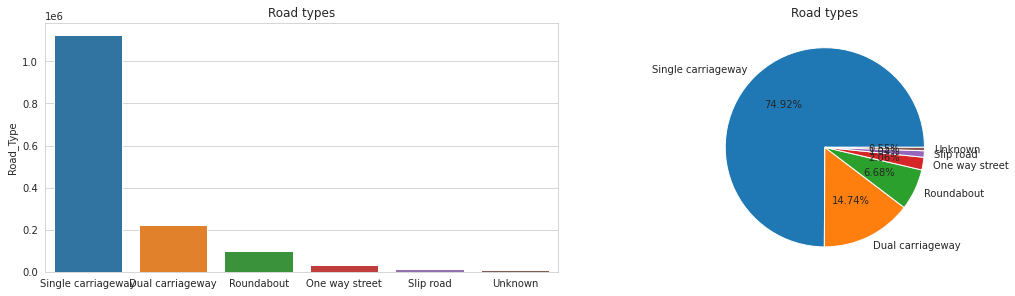

Single carriageway    1126701
Dual carriageway       221707
Roundabout             100449
One way street          30973
Slip road               15666
Unknown                  8343
Name: Road_Type, dtype: int64

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,4))
road = accidents["Road_Type"].value_counts()

sns.barplot(ax=axs[0], x = road.index, y = road)
axs[0].set_title("Road types")

axs[1].pie(road, labels=road.index, autopct='%1.2f%%')
axs[1].set_title("Road types")

plt.show()

road

**Single carriageway** is by far the road type with most accidents. I think **Roundabouts** should also be mentioned, I don't think there are that many of them, still many accidents seem to occur around them.

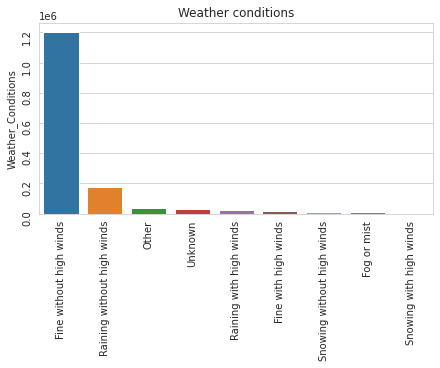

Fine without high winds       1203705
Raining without high winds     177626
Other                           33495
Unknown                         28280
Raining with high winds         20808
Fine with high winds            18352
Snowing without high winds      11299
Fog or mist                      8188
Snowing with high winds          1960
Name: Weather_Conditions, dtype: int64

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(6,5))
weather = accidents["Weather_Conditions"].value_counts()

sns.barplot(ax=axs, x = weather.index, y = weather)
axs.set_title("Weather conditions")
axs.tick_params(labelrotation=90)


plt.show()

weather

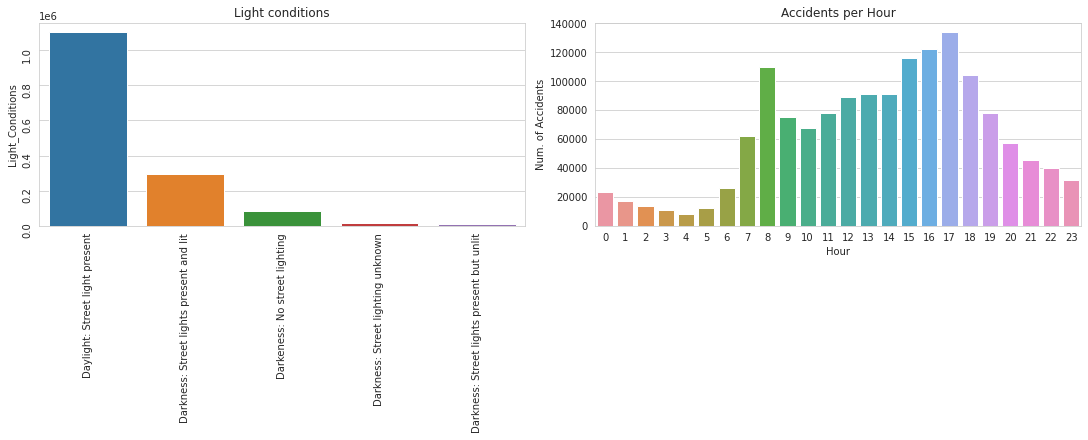

Daylight: Street light present               1102015
Darkness: Street lights present and lit       296274
Darkeness: No street lighting                  82537
Darkness: Street lighting unknown              16109
Darkness: Street lights present but unlit       6904
Name: Light_Conditions, dtype: int64

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,6))
light = accidents["Light_Conditions"].value_counts()

sns.barplot(ax=axs[0], x = light.index, y = light)
axs[0].set_title("Light conditions")
axs[0].tick_params(labelrotation=90)

sns.barplot(ax=axs[1], x = df.index, y = df["Num. of Accidents"])
axs[1].set_title("Accidents per Hour")

plt.show()

light

Here again, we can see that most accidents occur during daytime, with day light. However, we would need the total number of trips during each condition to look for a correlation with accidents.

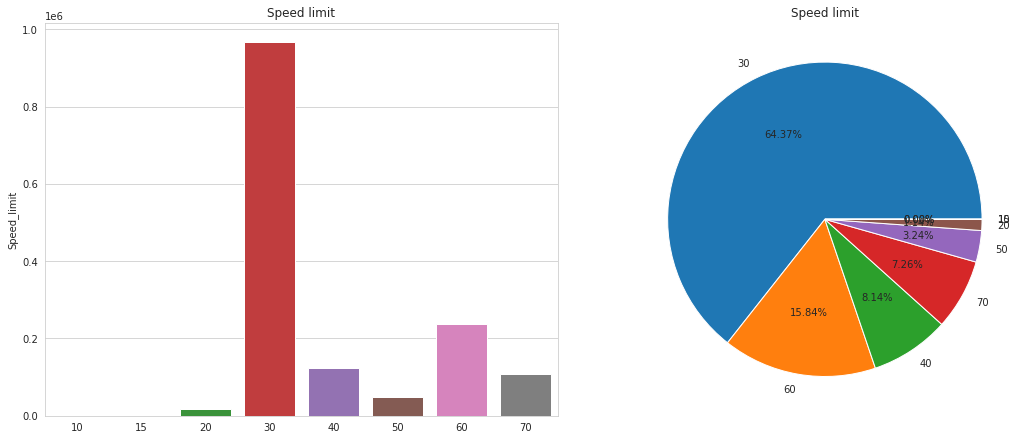

30    968094
60    238166
40    122376
70    109249
50     48778
20     17152
10        14
15        10
Name: Speed_limit, dtype: int64

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,6))
speed = accidents["Speed_limit"].value_counts()

sns.barplot(ax=axs[0], x = speed.index, y = speed)
axs[0].set_title("Speed limit")

axs[1].pie(speed, labels=speed.index, autopct='%1.2f%%')
axs[1].set_title("Speed limit")

plt.show()

speed

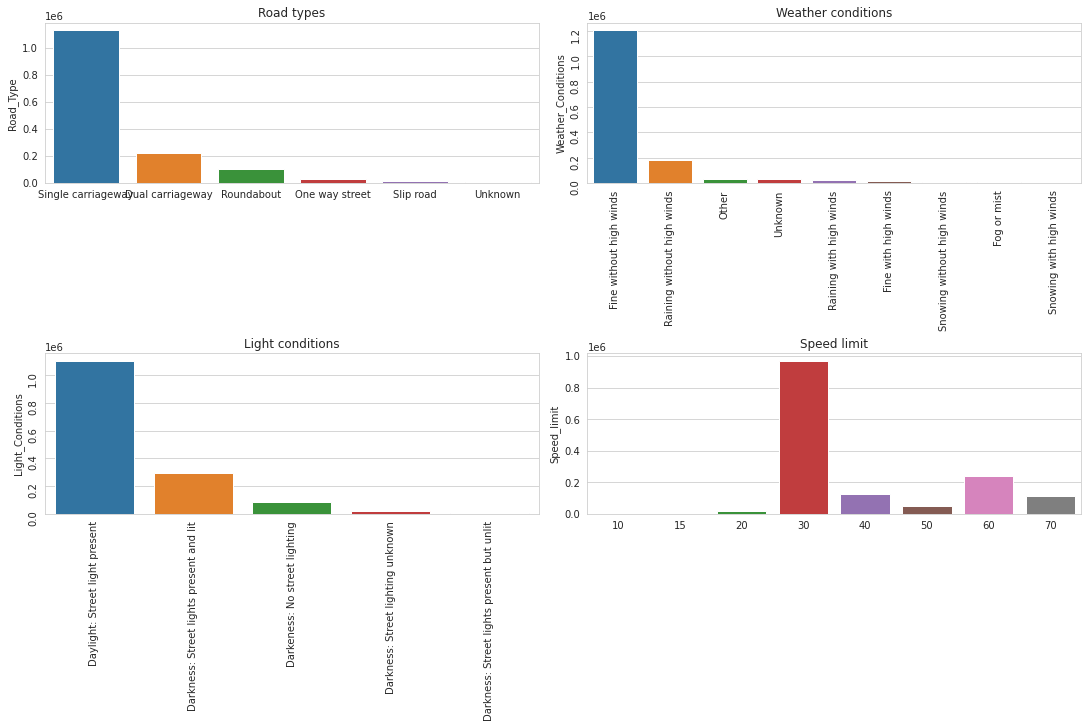

In [20]:
fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(15,10))

sns.barplot(ax=axs[0,0], x = road.index, y = road)
axs[0,0].set_title("Road types")

sns.barplot(ax=axs[0,1], x = weather.index, y = weather)
axs[0,1].set_title("Weather conditions")
axs[0,1].tick_params(labelrotation=90)

sns.barplot(ax=axs[1,0], x = light.index, y = light)
axs[1,0].set_title("Light conditions")
axs[1,0].tick_params(labelrotation=90)

sns.barplot(ax=axs[1,1], x = speed.index, y = speed)
axs[1,1].set_title("Speed limit")

plt.show()